In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [4]:
# counting null values present in each column
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
# making instance for object list

objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [6]:
# making instance for int and float

jList = df.select_dtypes(exclude = "object").columns
print (jList)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [7]:
# filling the null values of numerical columns

for j in jList:
  df[j].fillna(df[j].mean(),inplace=True)

In [8]:
# filling null values for categorical columns
for obj in objList:
  df[obj].fillna(df[obj].mode()[0],inplace=True)

In [9]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [10]:
# describing the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8425.0,13.193305,5.379488,-2.0,9.300000,13.200000,17.300000,28.5
MaxTemp,8425.0,23.859976,6.114516,8.2,19.300000,23.300000,28.000000,45.5
Rainfall,8425.0,2.805913,10.309308,0.0,0.000000,0.000000,1.400000,371.0
Evaporation,8425.0,5.389395,3.852004,0.0,4.000000,5.389395,5.389395,145.0
Sunshine,8425.0,7.632205,2.825451,0.0,7.632205,7.632205,8.900000,13.9
WindGustSpeed,8425.0,40.174469,13.776101,7.0,31.000000,40.174469,48.000000,107.0
WindSpeed9am,8425.0,13.847646,10.128579,0.0,6.000000,13.000000,20.000000,63.0
WindSpeed3pm,8425.0,18.533662,9.704759,0.0,11.000000,19.000000,24.000000,83.0
Humidity9am,8425.0,67.822496,16.774231,10.0,56.000000,68.000000,80.000000,100.0
Humidity3pm,8425.0,51.249790,18.311894,6.0,39.000000,51.000000,63.000000,99.0


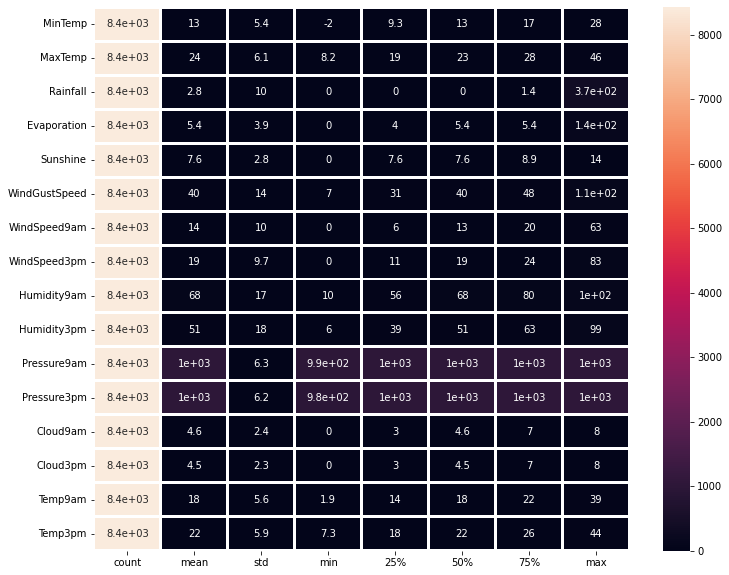

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.describe().T,annot=True,linewidth=2)

In [12]:
# converting categorical values to numerical values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for ob in objList:
  df[ob]=le.fit_transform(df[ob])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   int64  
 1   Location       8425 non-null   int64  
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   int64  
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   int64  
 10  WindDir3pm     8425 non-null   int64  
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

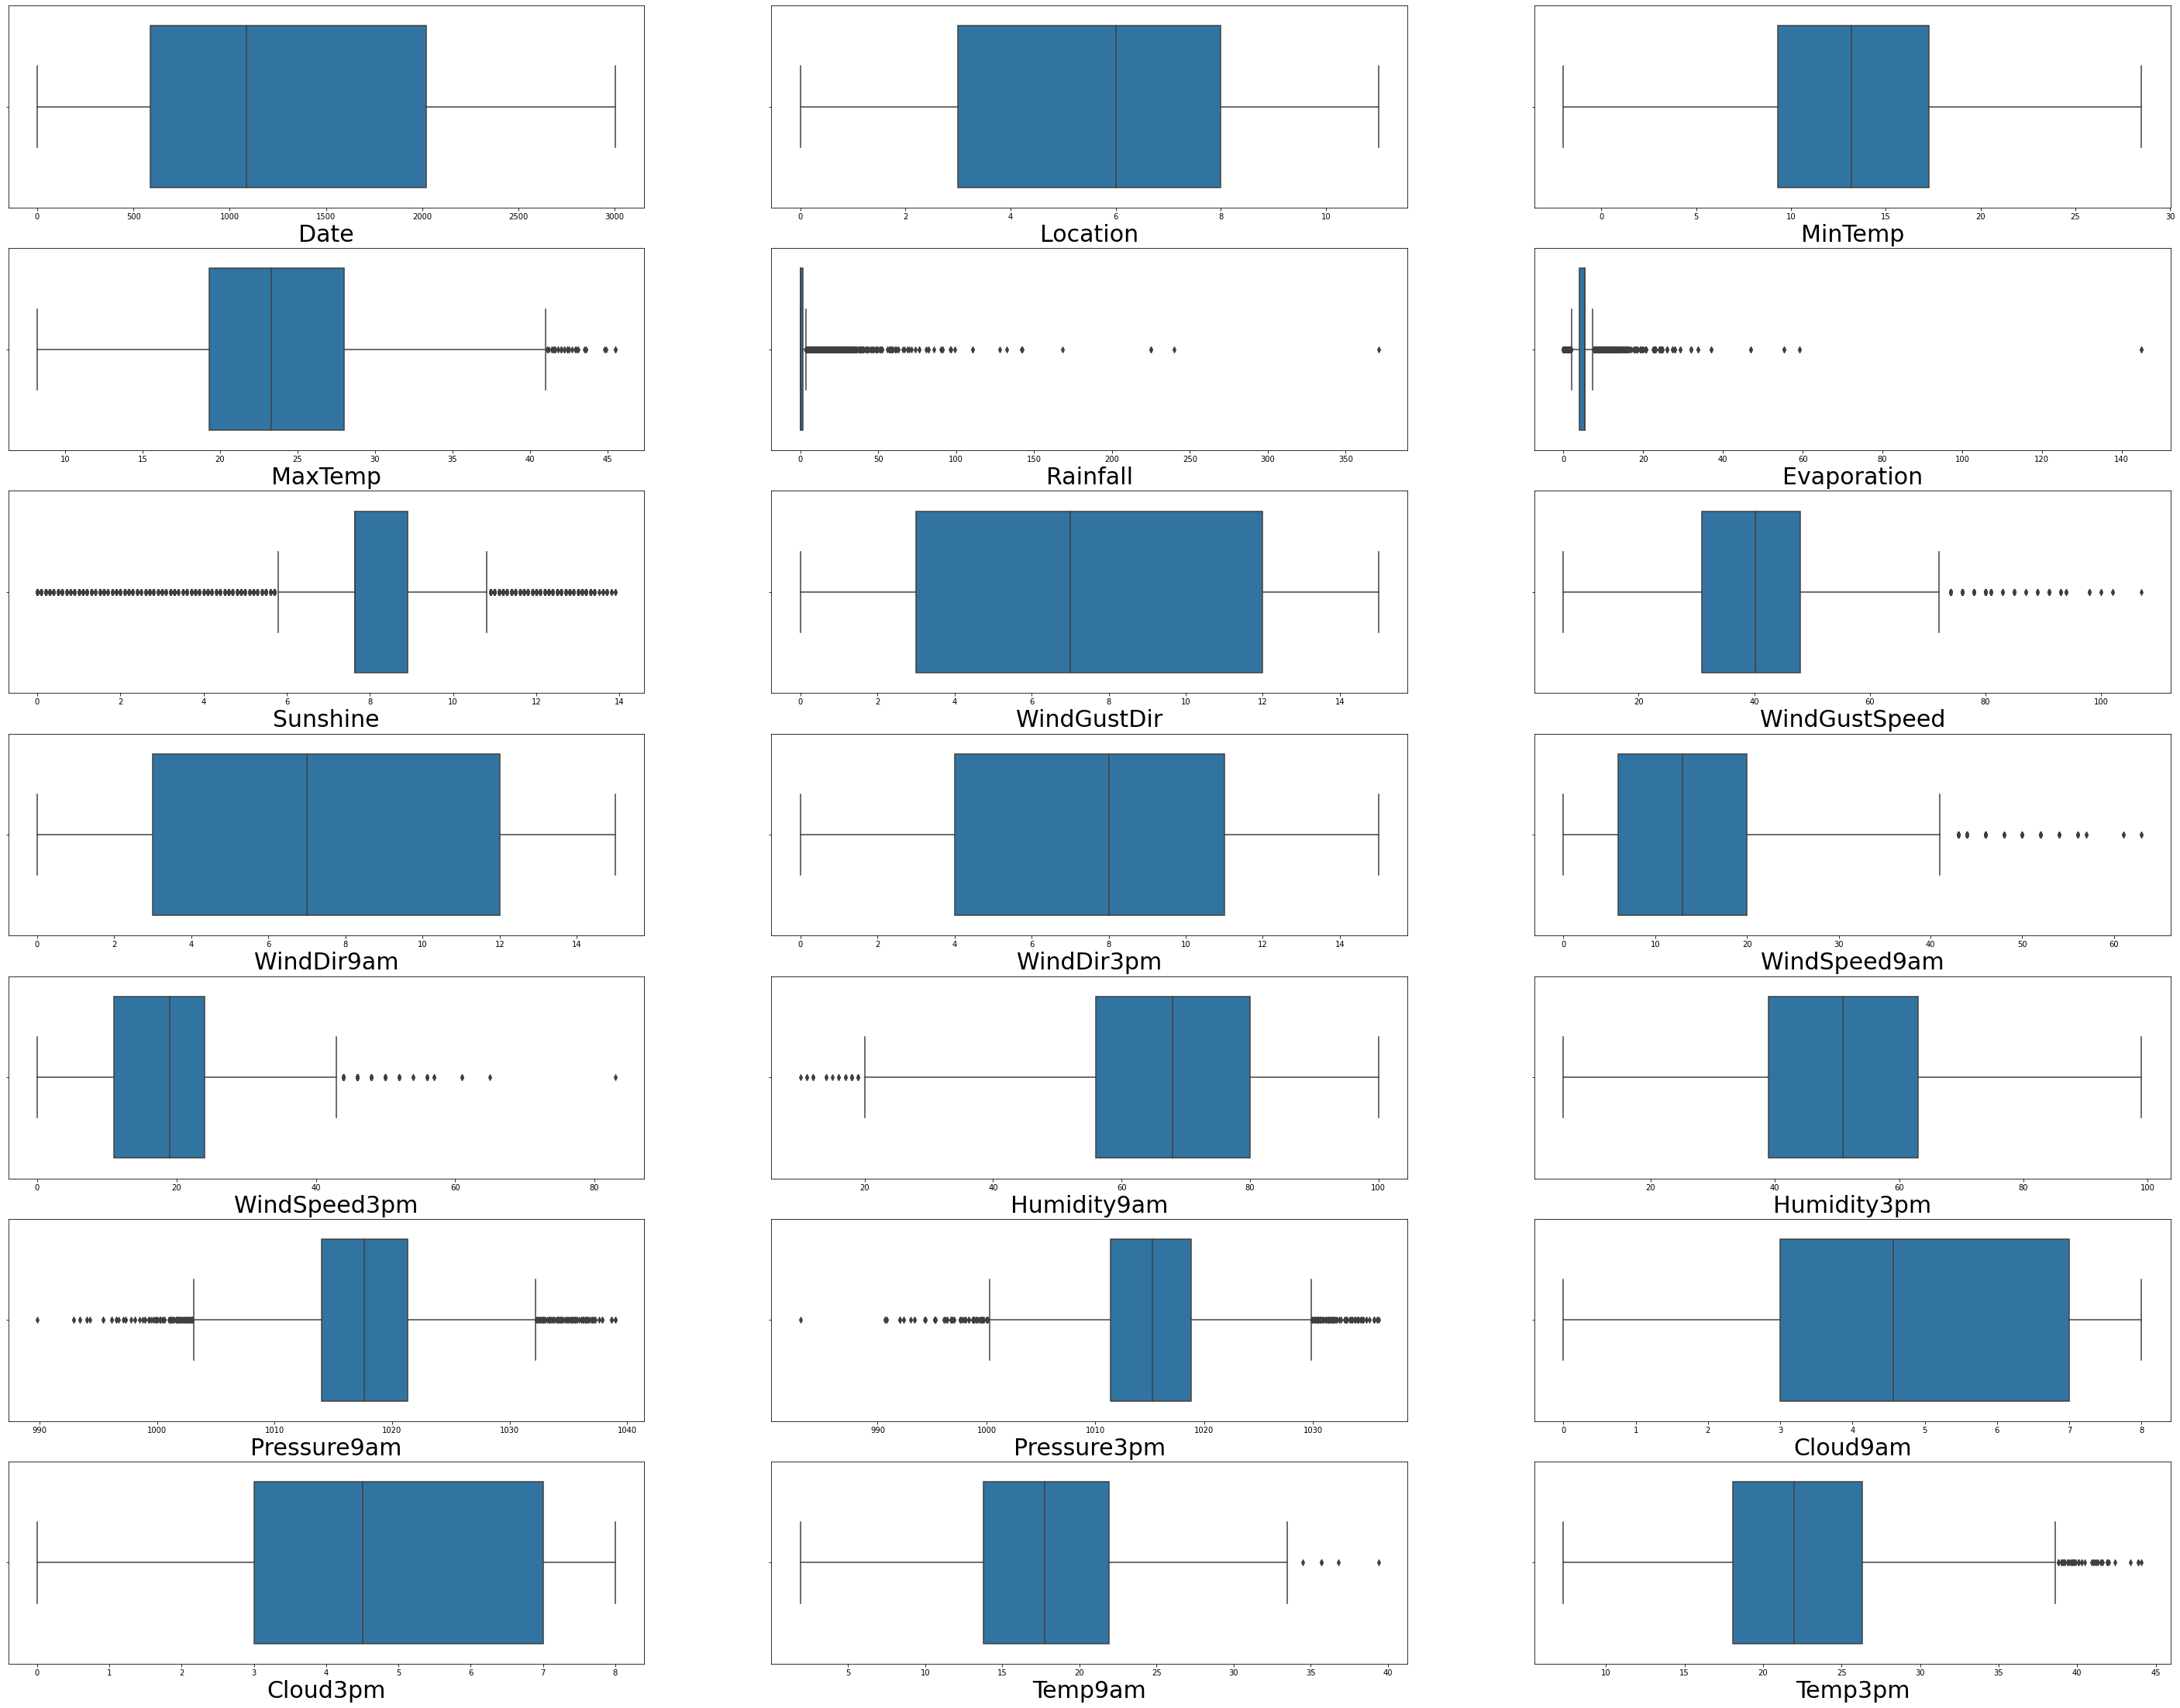

In [14]:
plotnumber = 1
plt.figure(figsize=(50,120))
for column in df.columns:
  if plotnumber<=21:

    ax = plt.subplot(21,3,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=30)
  plotnumber+=1
plt.show()

In [15]:
# checking z score to remove outliers

from scipy import stats

z = np.abs(stats.zscore(df))

print(z)

[[1.51787928 1.51577598 0.03842501 ... 0.10813805 0.55609919 0.55628212]
 [1.5167086  1.51577598 1.07698898 ... 0.31234833 0.55609919 0.55628212]
 [1.51553791 1.51577598 0.05452616 ... 0.12733432 0.55609919 0.55628212]
 ...
 [1.99535467 1.01389522 1.44879364 ... 0.61509853 0.55609919 0.55628212]
 [1.99652536 1.01389522 1.00262804 ... 0.59827907 0.55609919 0.55628212]
 [1.99769605 1.01389522 0.31727851 ... 0.25951315 0.55609919 0.55628212]]


In [16]:
index = (np.where(z>3)[0])

In [17]:
df = df.drop(df.index[index])

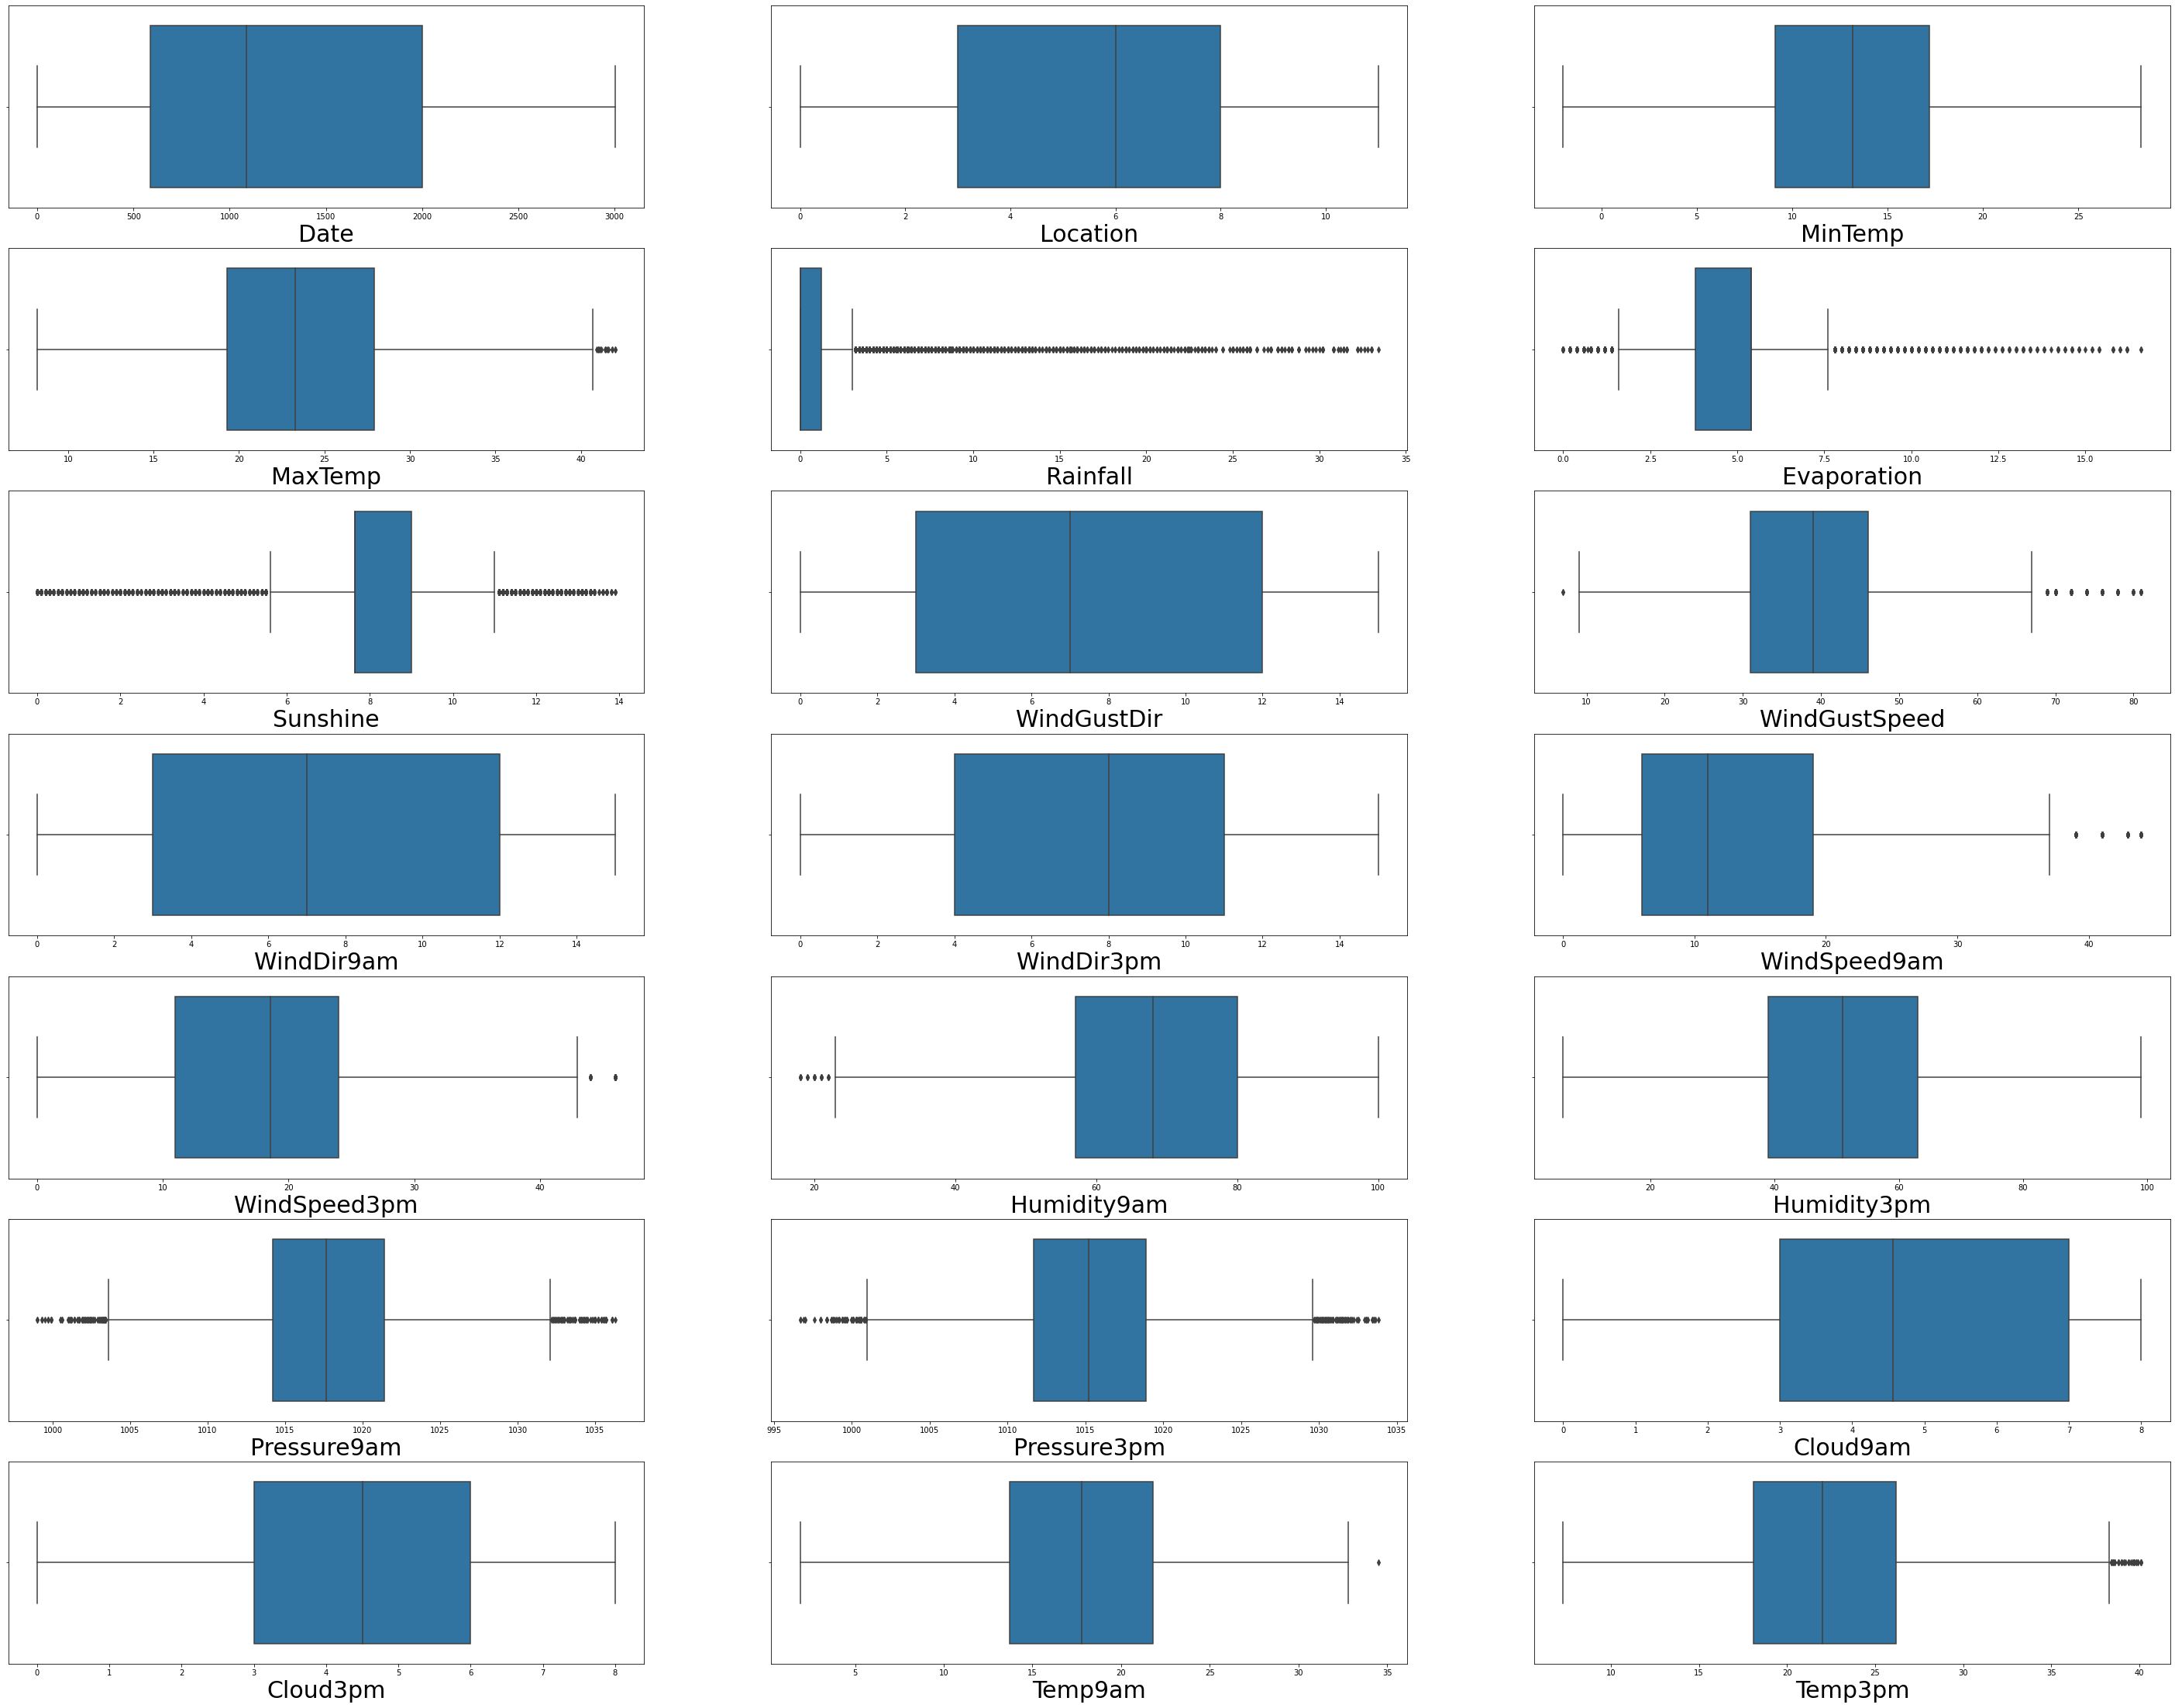

In [18]:
plotnumber = 1
plt.figure(figsize=(50,120))
for column in df.columns:
  if plotnumber<=21:

    ax = plt.subplot(21,3,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=30)
  plotnumber+=1
plt.show()

In [19]:
df.shape

(7987, 23)

In [20]:
df.skew()

Date             0.398008
Location        -0.040284
MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustDir      0.112339
WindGustSpeed    0.506897
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
RainTomorrow     1.296077
dtype: float64

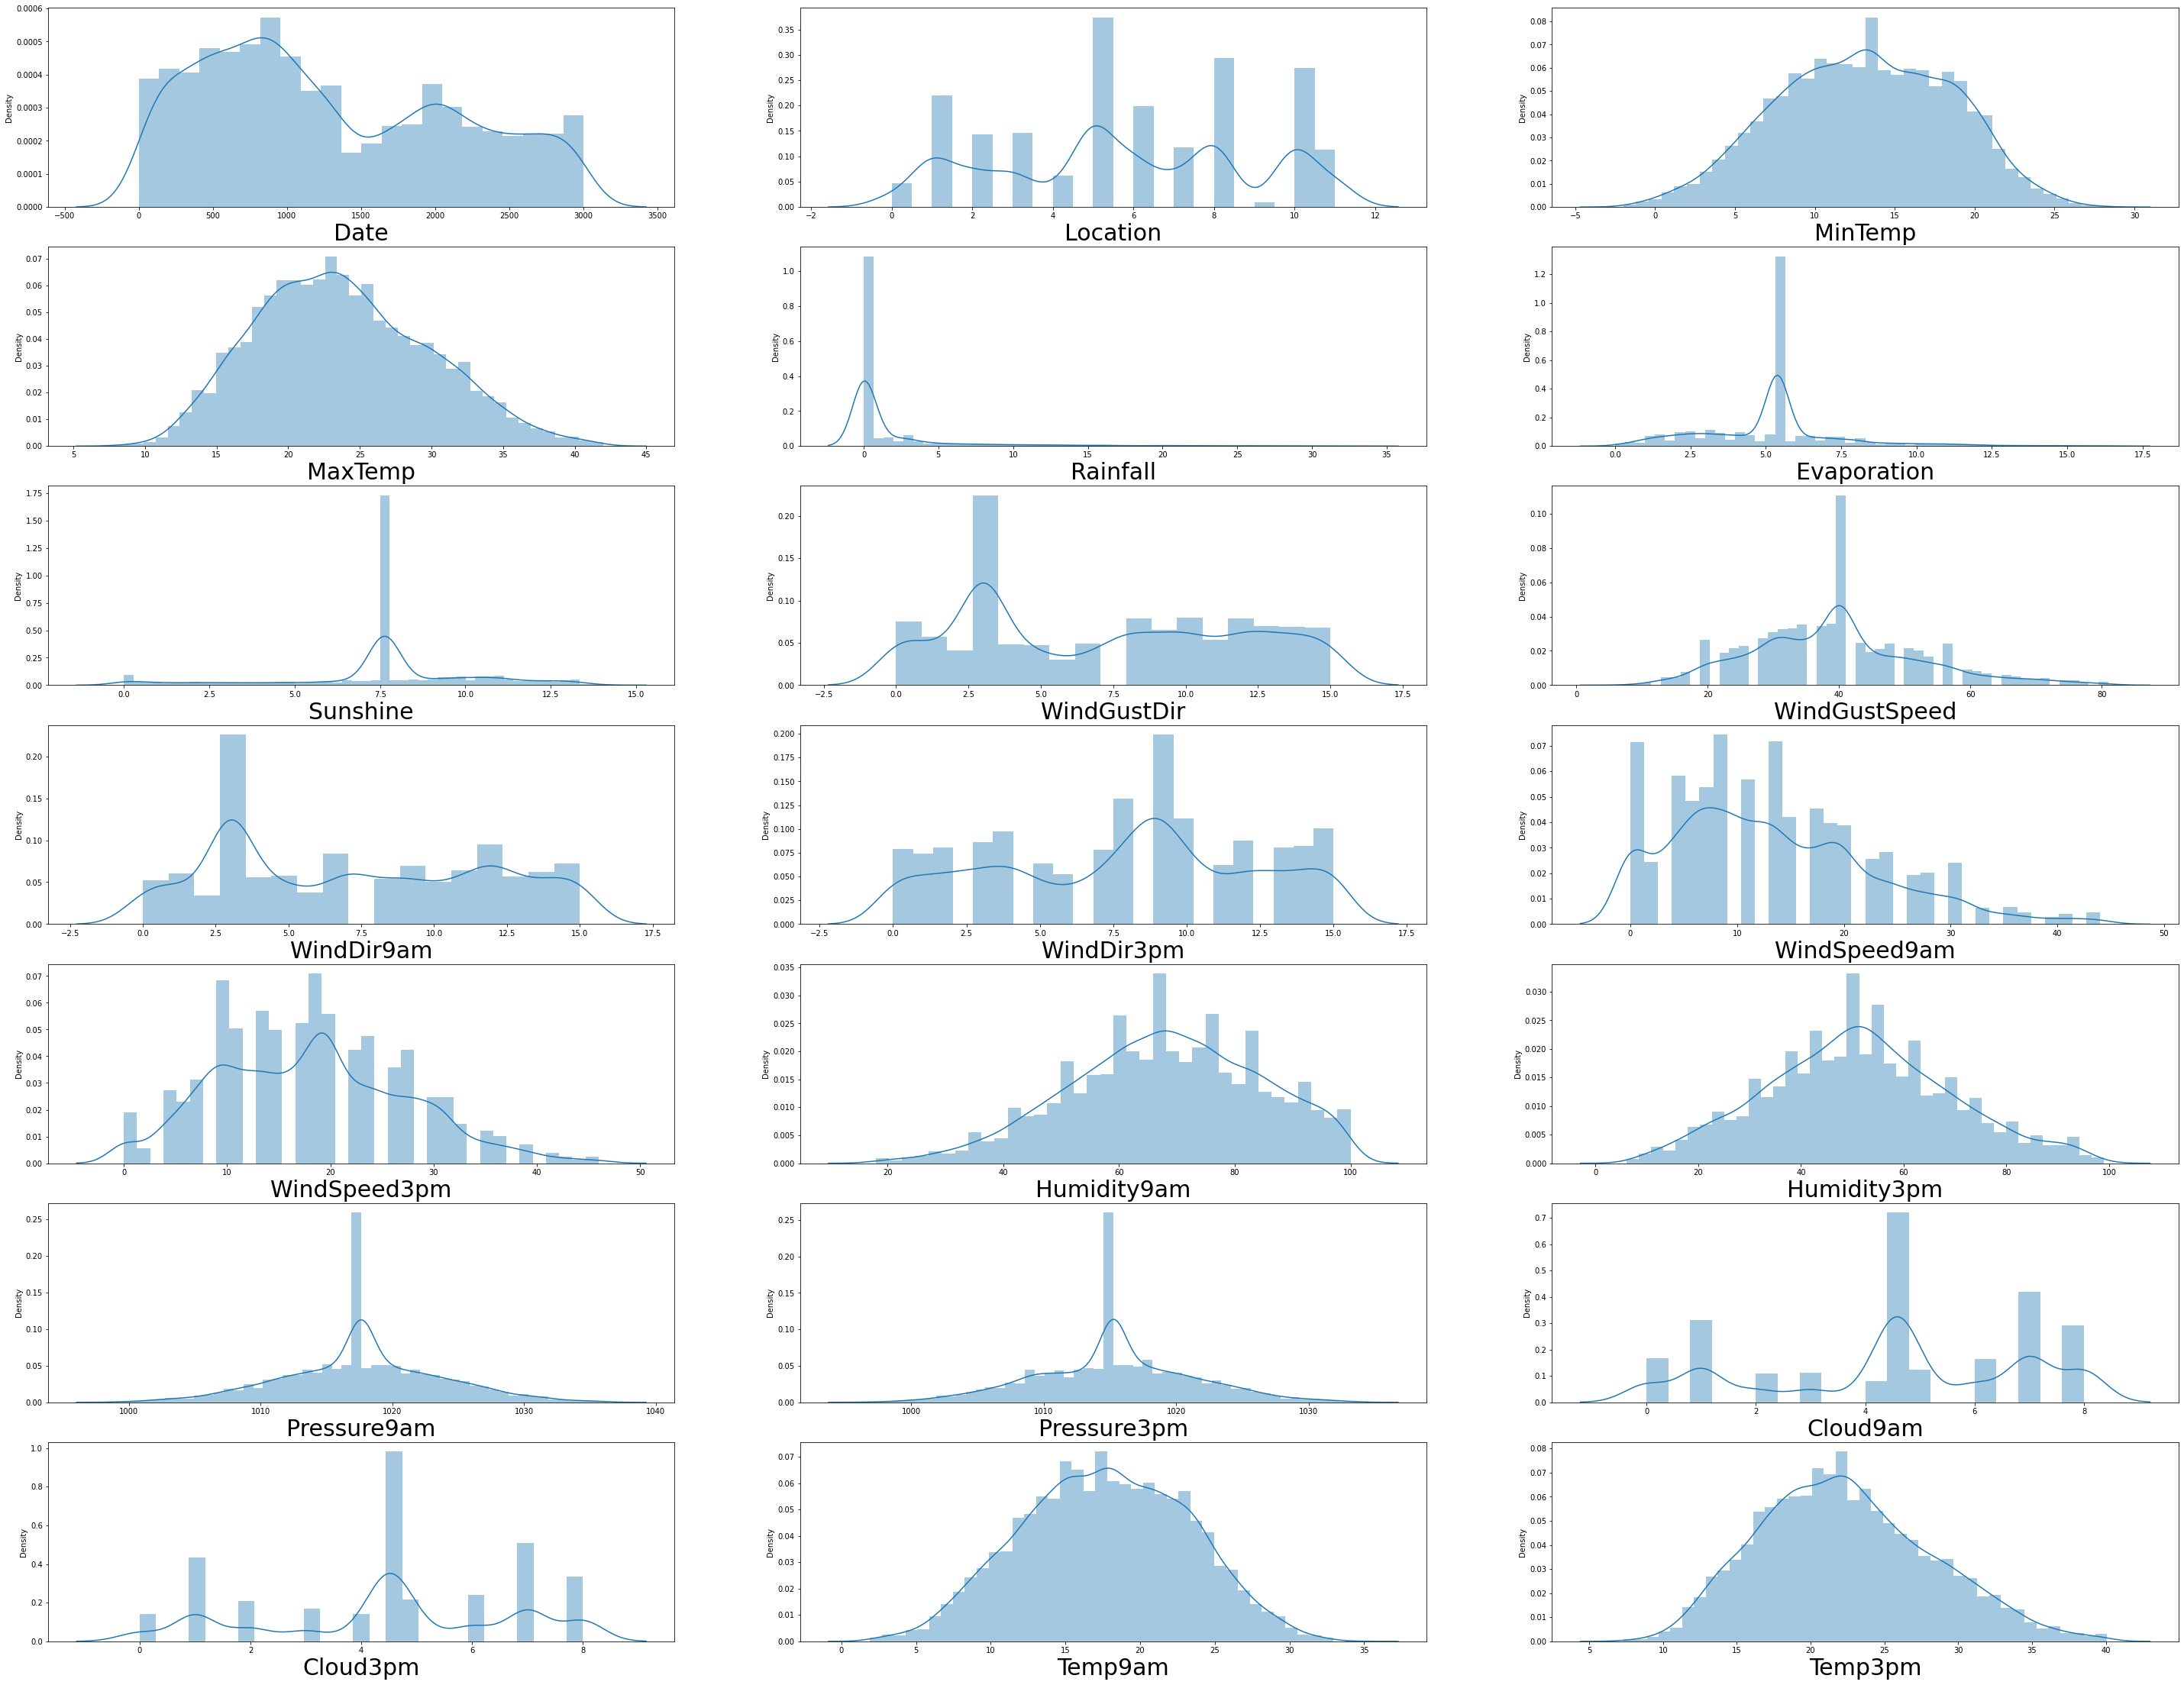

In [21]:
plotnumber = 1
plt.figure(figsize=(50,120))
for column in df.columns:
  if plotnumber<=21:

    ax = plt.subplot(21,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=30)
  plotnumber+=1
plt.show()

In [22]:
# reducing skewness

from scipy.special import boxcox1p

df['Rainfall'] = boxcox1p(df['Rainfall'],0)

In [23]:
df.skew()

Date             0.398008
Location        -0.040284
MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         1.662475
Evaporation      0.846181
Sunshine        -0.723970
WindGustDir      0.112339
WindGustSpeed    0.506897
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
RainTomorrow     1.296077
dtype: float64

In [24]:
cor=df.corr()
cor

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.469427,0.012806,0.102884,0.015882,0.118910,0.055403,-0.091958,-0.031360,-0.031551,...,0.094019,-0.036806,0.039427,0.019855,0.006057,-0.000503,0.067969,0.115762,-0.008403,-0.003201
Location,0.469427,1.000000,0.116694,0.063798,0.024150,0.132245,0.048579,-0.037707,0.245658,-0.041030,...,0.003725,0.059978,-0.024265,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222
MinTemp,0.012806,0.116694,1.000000,0.718598,0.090532,0.372576,0.065682,-0.154935,0.231097,-0.045231,...,-0.126383,0.090208,-0.433113,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021
MaxTemp,0.102884,0.063798,0.718598,1.000000,-0.203744,0.468786,0.387050,-0.237955,0.136337,-0.217160,...,-0.382687,-0.409560,-0.333569,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708
Rainfall,0.015882,0.024150,0.090532,-0.203744,1.000000,-0.158124,-0.231262,0.124443,0.102763,0.151125,...,0.376529,0.357198,-0.124103,-0.046931,0.284774,0.241878,-0.075411,-0.214122,0.870494,0.319771
Evaporation,0.118910,0.132245,0.372576,0.468786,-0.158124,1.000000,0.369080,-0.121384,0.200769,-0.115309,...,-0.325325,-0.231465,-0.262043,-0.275720,-0.116113,-0.146421,0.439628,0.454352,-0.163847,-0.089365
Sunshine,0.055403,0.048579,0.065682,0.387050,-0.231262,0.369080,1.000000,-0.104739,0.009797,-0.076595,...,-0.366337,-0.437504,-0.004078,-0.063832,-0.527350,-0.541996,0.261680,0.403489,-0.219089,-0.317675
WindGustDir,-0.091958,-0.037707,-0.154935,-0.237955,0.124443,-0.121384,-0.104739,1.000000,0.005465,0.405681,...,0.031081,0.051061,-0.095047,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378
WindGustSpeed,-0.031360,0.245658,0.231097,0.136337,0.102763,0.200769,0.009797,0.005465,1.000000,-0.069460,...,-0.263933,-0.085009,-0.377284,-0.336132,0.013678,0.064375,0.198936,0.101786,0.076677,0.181478
WindDir9am,-0.031551,-0.041030,-0.045231,-0.217160,0.151125,-0.115309,-0.076595,0.405681,-0.069460,1.000000,...,0.009571,0.117910,-0.003943,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091


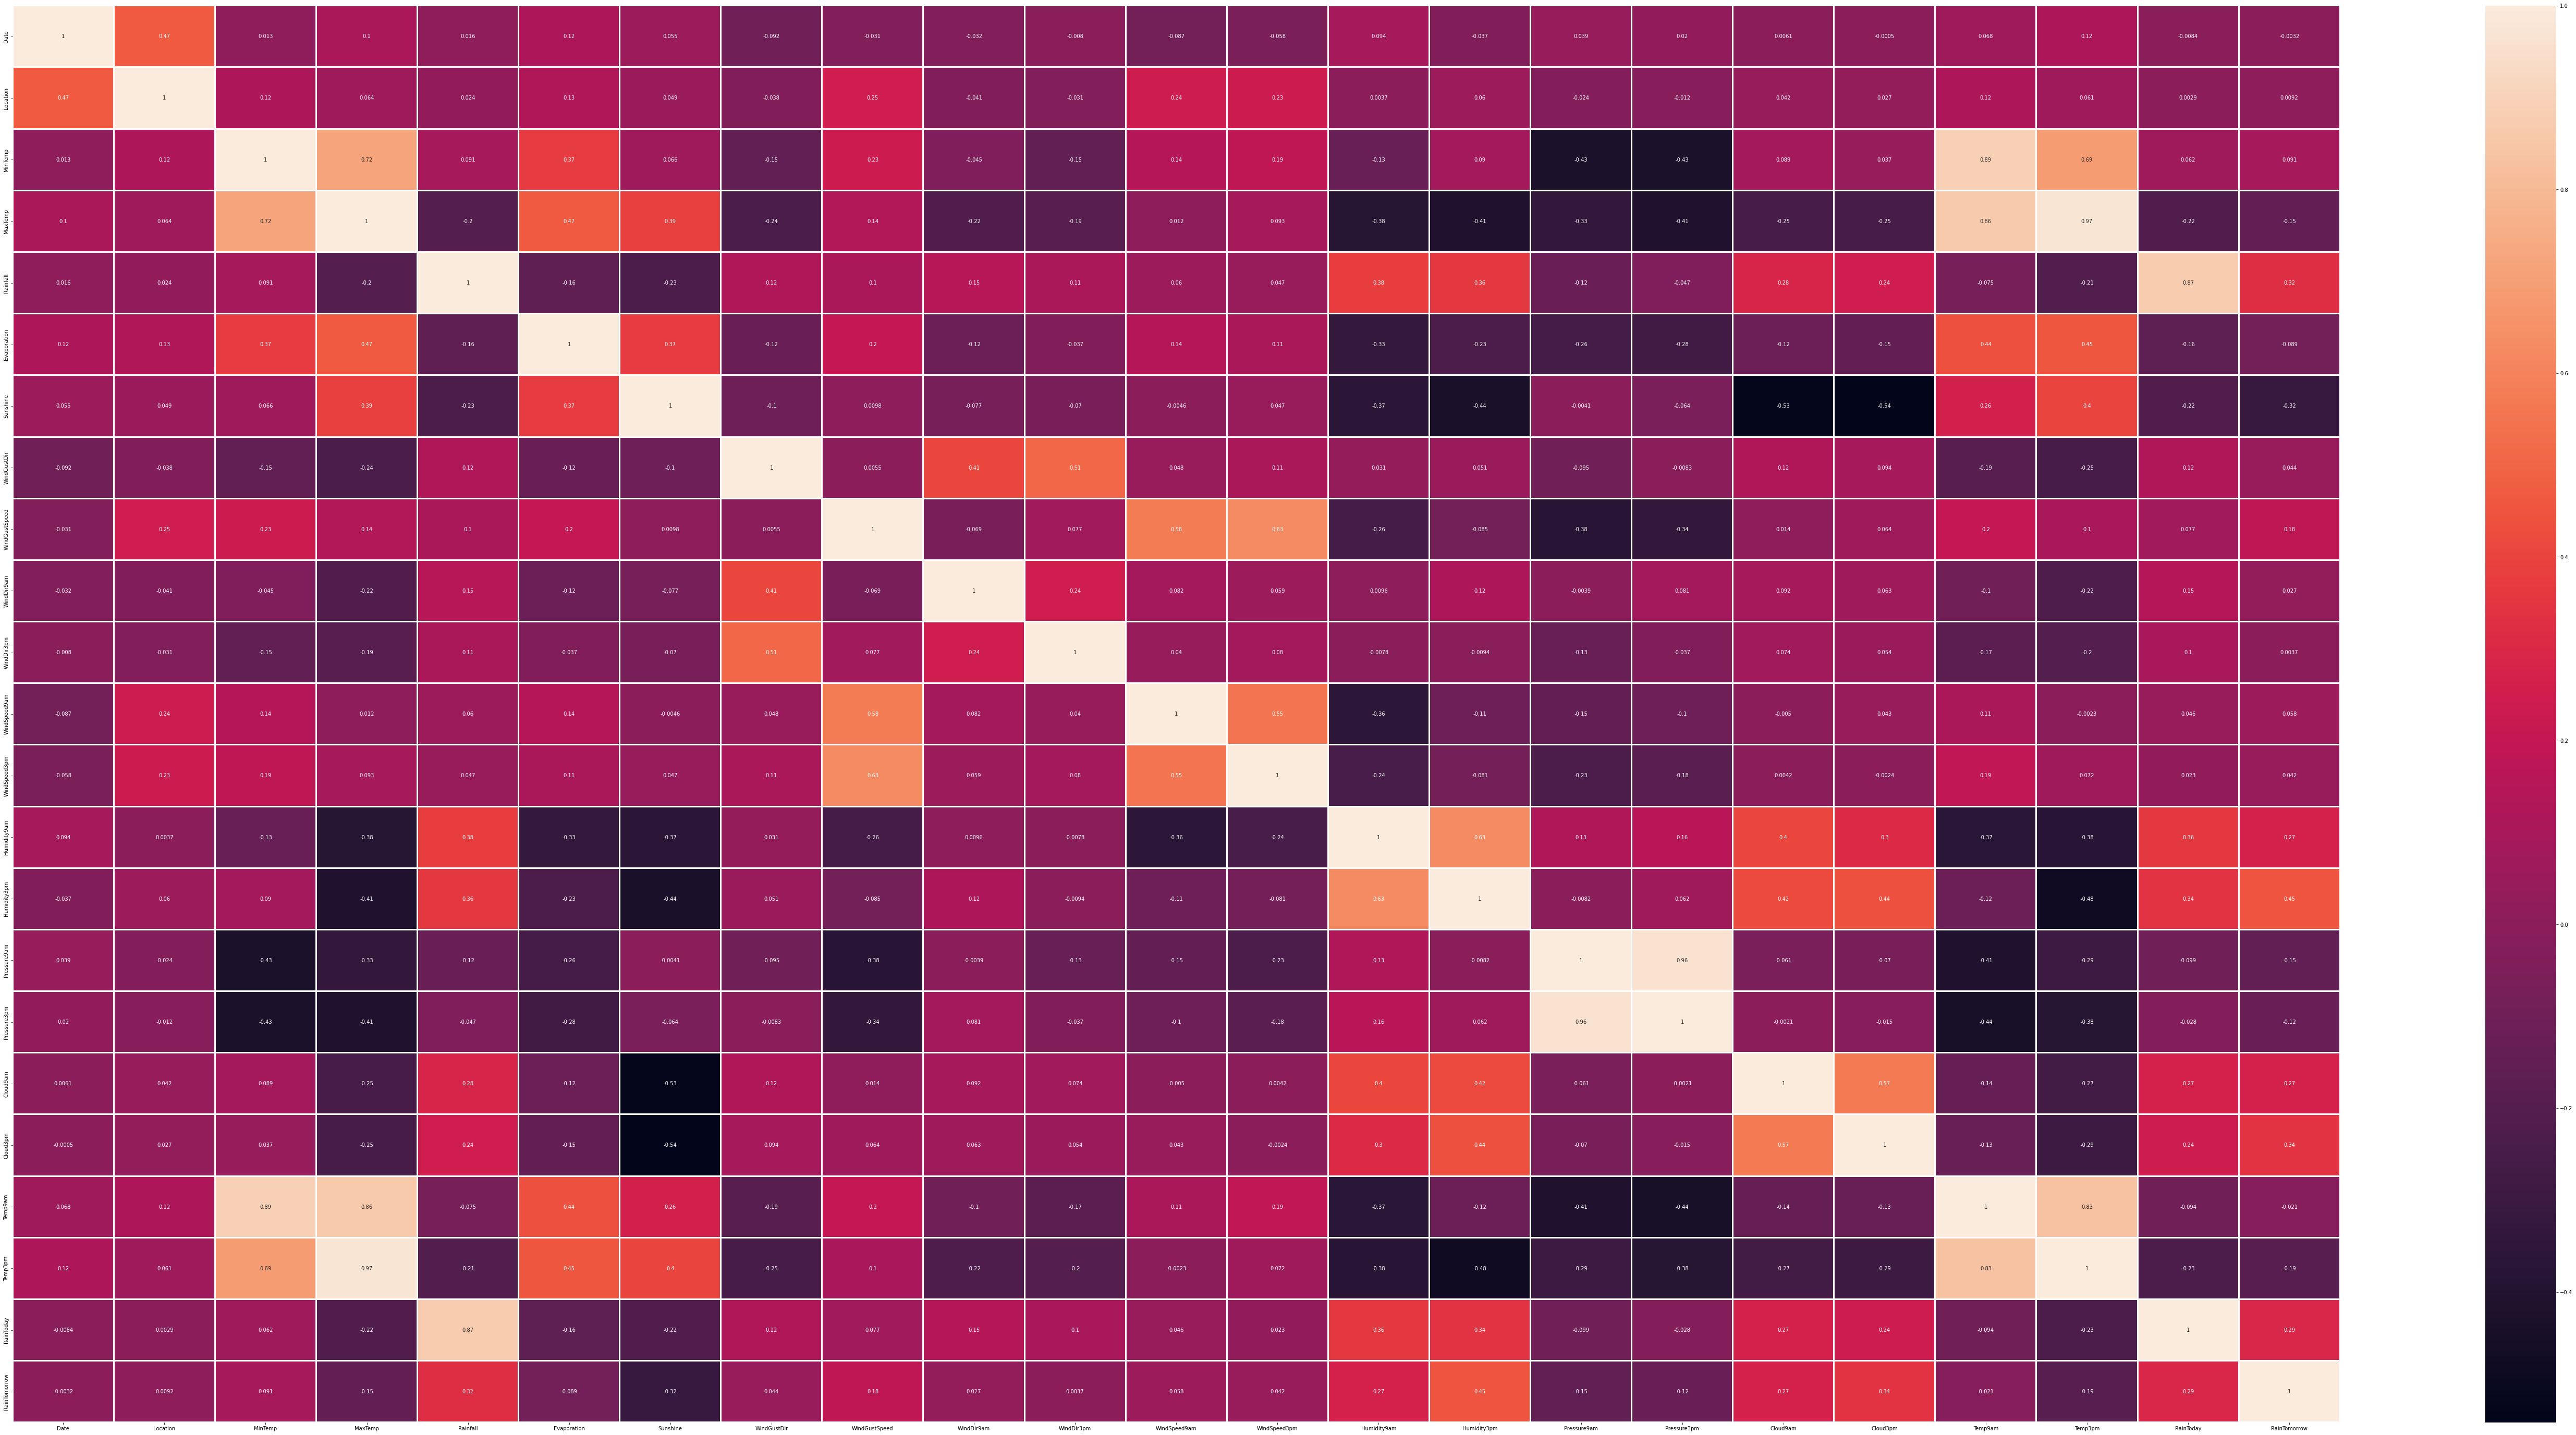

In [25]:
plt.figure(figsize=(100,50))
sns.heatmap(cor,annot=True,linewidth=2)

In [26]:
# separating features and label

x = df.drop(['RainTomorrow'],axis=1)
x = pd.DataFrame(x)
x

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0,1,13.4,22.900000,0.470004,5.389395,7.632205,13,44.000000,13,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0
1,1,1,7.4,25.100000,0.000000,5.389395,7.632205,14,44.000000,6,...,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0
2,2,1,12.9,25.700000,0.000000,5.389395,7.632205,15,46.000000,13,...,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0
3,3,1,9.2,28.000000,0.000000,5.389395,7.632205,4,24.000000,9,...,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0
4,4,1,17.5,32.300000,0.693147,5.389395,7.632205,13,41.000000,1,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.400000,0.000000,5.389395,7.632205,0,31.000000,9,...,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0
8421,3000,9,3.6,25.300000,0.000000,5.389395,7.632205,6,22.000000,9,...,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0
8422,3001,9,5.4,26.900000,0.000000,5.389395,7.632205,3,37.000000,9,...,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0
8423,3002,9,7.8,27.000000,0.000000,5.389395,7.632205,9,28.000000,10,...,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0


In [27]:
y = df['RainTomorrow']
y=pd.DataFrame(y)
y

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
...,...
8420,0
8421,0
8422,0
8423,0


In [28]:
# scaling the features

from sklearn.preprocessing import StandardScaler
ss= StandardScaler().fit_transform(x)

In [29]:
#checking for is there any VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = ss

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = x.columns
vif

,VIF,Features
0,1.485265,Date
1,1.543761,Location
2,8.564621,MinTemp
3,26.365004,MaxTemp
4,4.390391,Rainfall
5,1.545406,Evaporation
6,1.938802,Sunshine
7,1.614305,WindGustDir
8,2.314758,WindGustSpeed
9,1.351757,WindDir9am


In [30]:
x.drop(['MaxTemp','Pressure9am','Temp3pm'],axis=1,inplace=True) # droping the columns

In [31]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(x)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=x.columns
vif

,vif,Features
0,1.483447,Date
1,1.540976,Location
2,8.382086,MinTemp
3,4.363517,Rainfall
4,1.512760,Evaporation
5,1.920961,Sunshine
6,1.594067,WindGustDir
7,2.281288,WindGustSpeed
8,1.308148,WindDir9am
9,1.408690,WindDir3pm


In [32]:
x=X_scaled

In [33]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
y = le.fit_transform(y)

In [35]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

# finding best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print("Best accuracy is",maxAccu," on Random_state",maxRS)

Best accuracy is 0.8485607008760951  on Random_state 1


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)

print("Loistic regression Accuraccy :",accuracy_score(y_test,pred_LR))
print("*"*40)
cmLR = confusion_matrix(y_test,pred_LR)
print(cmLR)
print("*"*40)
print("Classification Report :",classification_report(y_test,pred_LR))

Loistic regression Accuraccy : 0.8318731748018356
****************************************
[[1710  112]
 [ 291  284]]
****************************************
Classification Report :               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1822
           1       0.72      0.49      0.58       575

    accuracy                           0.83      2397
   macro avg       0.79      0.72      0.74      2397
weighted avg       0.82      0.83      0.82      2397



Text(33.0, 0.5, 'Actual values')

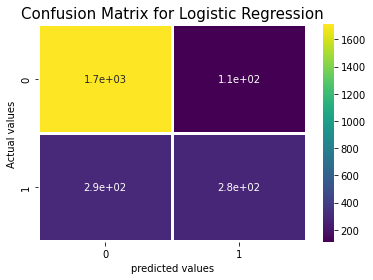

In [40]:
sns.heatmap(cmLR,annot=True,cmap='viridis',linewidth=2)
plt.title('Confusion Matrix for Logistic Regression',fontsize=15)
plt.xlabel('predicted values')
plt.ylabel('Actual values')

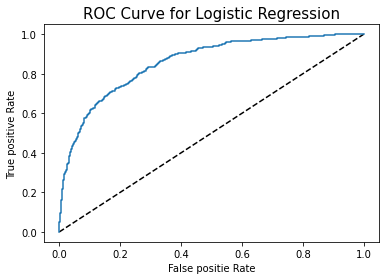

In [41]:
# AUC ROC curve for logistic regression

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


pred_LR_proba=LR.predict_proba(x_test)[:,1]
fpr,tpr,threholds = roc_curve(y_test,pred_LR_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.title('ROC Curve for Logistic Regression',fontsize=15)
plt.xlabel('False positie Rate')
plt.ylabel('True positive Rate')
plt.show()

In [42]:
# roc auc score 
LR_auc_score = roc_auc_score(y_test,pred_LR)
LR_auc_score

0.7162210661957714

In [43]:
# cross validation for LogisticRegression

from sklearn.model_selection import cross_val_score

LR_score = cross_val_score(LR,x,y,cv=5)
print(LR_score)

print(LR_score.mean())

[0.85669587 0.79349186 0.79774577 0.81966187 0.86036318]
0.8255917109912752


In [44]:
# DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier

# finding best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print("Best accuracy is",maxAccu," on Random_state",maxRS)


Best accuracy is 0.8577388402169378  on Random_state 1


HYPER PARAMETER TUNING FOR DECISSION TREE CLASSIFIER

In [45]:
from sklearn.model_selection import GridSearchCV

criterion = {'criterion':['gini','entropy']}

grid = GridSearchCV(estimator=dt,param_grid=criterion)
grid.fit(x_train,y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})
0.8282647584973166
DecisionTreeClassifier(criterion='entropy')
{'criterion': 'entropy'}


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.33)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

print("Accuracy Score :", accuracy_score(y_test,dt_pred))
print('*'*40)
dtcm = confusion_matrix(y_test,dt_pred)
print("confusion_matrix : ",dtcm)
print('*'*40)
print("Classification Report :",classification_report)

Accuracy Score : 0.83649468892261
****************************************
confusion_matrix :  [[1811  211]
 [ 220  394]]
****************************************
Classification Report : <function classification_report at 0x7f5d4cdd8b90>


Text(0.5, 15.0, 'Predicted Values')

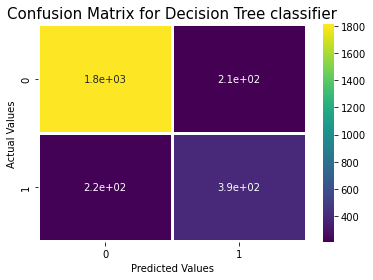

In [47]:
# heatmap of confusion matrix of Decision Tree Classifier

sns.heatmap(dtcm,annot=True,cmap='viridis',linewidth=2)
plt.title('Confusion Matrix for Decision Tree classifier',fontsize=15)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

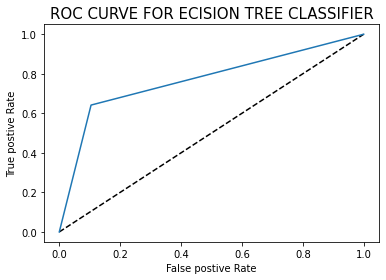

In [48]:
# roc curve for decision Tree Classifier

dt_proba_pred = dt.predict_proba(x_test)[:,1]

dfpr,dtpr,dthresholds = roc_curve(y_test,dt_proba_pred)

plt.plot([0,1],[0,1],'k--')
plt.plot(dfpr,dtpr,label='Decision Tree Classifier')
plt.xlabel('False postive Rate')
plt.ylabel('True postive Rate')
plt.title('ROC CURVE FOR ECISION TREE CLASSIFIER',fontsize=15)
plt.show()

In [49]:
# roc score
dt_roc_score = roc_auc_score(y_test,dt_pred)
dt_roc_score

0.7686708422337993

In [50]:
# cross validation for Decision Tree Classifier

dt_score = cross_val_score(dt,x,y,cv=5)
print(dt_score)

print(dt_score.mean())

[0.63829787 0.81602003 0.82341891 0.74076393 0.77896055]
0.7594922582470417


Support Vector Machine

Hyper parameter Tuning for Support Vector Machine

In [51]:
from sklearn.svm import SVC
svc = SVC()

# hyperparameter tuning
kernel={'kernel':['linear','poly','rbf']}
from sklearn.model_selection import GridSearchCV
gridsvc = GridSearchCV(estimator=svc, param_grid=kernel)
gridsvc.fit(x_train,y_train)
print(gridsvc)

print(gridsvc.best_score_)
print(gridsvc.best_estimator_.kernel)
print(gridsvc.best_params_)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'poly', 'rbf']})
0.8458200476452262
rbf
{'kernel': 'rbf'}


In [52]:
svc = SVC(kernel='rbf',probability=True)
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)

print("Accuracy score for SVC : ",accuracy_score(y_test,svc_pred))
print('*'*40)
svccm = confusion_matrix(y_test,svc_pred)
print(svccm)
print('*'*40)
print('Classification Report :',classification_report(y_test,svc_pred))

Accuracy score for SVC :  0.8539453717754173
****************************************
[[1941   81]
 [ 304  310]]
****************************************
Classification Report :               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2022
           1       0.79      0.50      0.62       614

    accuracy                           0.85      2636
   macro avg       0.83      0.73      0.76      2636
weighted avg       0.85      0.85      0.84      2636



Text(0.5, 15.0, 'Predicted values')

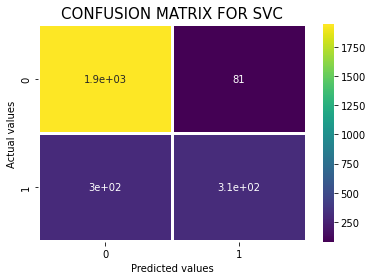

In [53]:
# heatmap of confusion Matrix

sns.heatmap(svccm,annot=True,linewidth=2,cmap='viridis')
plt.title('CONFUSION MATRIX FOR SVC',fontsize=15)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

In [54]:
# cross validation for Support Vector Machine

svc_score = cross_val_score(svc,x,y,cv=5)
print(svc_score)
print(svc_score.mean())

[0.84480601 0.81602003 0.8115216  0.81590482 0.84283031]
0.8262165527823996


K NEIGHBORS CLASSIFIER

HYPER PARAMETER TUNING FOR K NEIGHBORS CLASSIFIER

In [55]:
# KNEIGHBORS CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
# hyperparameter tuning
n_neighbors={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
from sklearn.model_selection import GridSearchCV
gridknn = GridSearchCV(estimator=knn, param_grid=n_neighbors)
gridknn.fit(x_train,y_train)
print(gridknn)

print(gridknn.best_score_)
print(gridknn.best_estimator_.n_neighbors)
print(gridknn.best_params_)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})
0.8327387278899099
5
{'n_neighbors': 5}


In [56]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

print("Accuracy score :",accuracy_score(y_test,knn_pred))
print('*'*40)
knncm = confusion_matrix(y_test,knn_pred)
print(knncm)
print('*'*40)
print('Classification Report :',classification_report(y_test,knn_pred))

Accuracy score : 0.8277693474962063
****************************************
[[1915  107]
 [ 347  267]]
****************************************
Classification Report :               precision    recall  f1-score   support

           0       0.85      0.95      0.89      2022
           1       0.71      0.43      0.54       614

    accuracy                           0.83      2636
   macro avg       0.78      0.69      0.72      2636
weighted avg       0.82      0.83      0.81      2636



Text(0.5, 15.0, 'Predicted values')

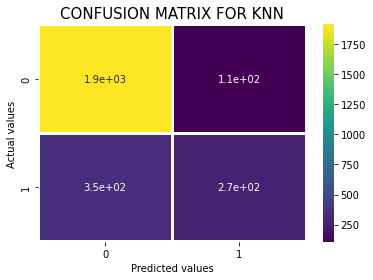

In [57]:
# confusion matrix heatmap

sns.heatmap(knncm,annot=True,cmap='viridis',linewidth=2)
plt.title('CONFUSION MATRIX FOR KNN',fontsize=15)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

In [58]:
# cross validation score

knn_score = cross_val_score(knn,x,y,cv=5)
print(knn_score)
print(knn_score.mean())

[0.81789737 0.80663329 0.80964308 0.80713838 0.82529743]
0.8133219122525575


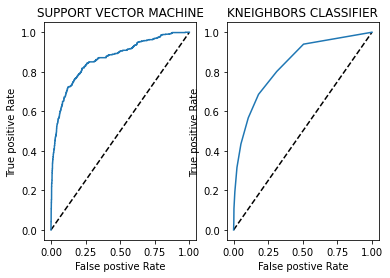

In [59]:
# AUC ROC Curve

#plot 1:
pred_svc_proba = svc.predict_proba(x_test)[:,1]
sfpr,stpr,sthresholds = roc_curve(y_test,pred_svc_proba)


plt.subplot(1, 2, 1)
plt.plot([0,1],[0,1],'k--')
plt.plot(sfpr,stpr,label='SUPPORT VECTOR MACHINE')
plt.xlabel('False postive Rate')
plt.ylabel('True positive Rate')
plt.title('SUPPORT VECTOR MACHINE')


#plot 2:
pred_knn_proba = knn.predict_proba(x_test)[:,1]
kfpr,ktpr,kthresholds = roc_curve(y_test,pred_knn_proba)


plt.subplot(1,2,2)
plt.plot([0,1],[0,1],'k--')
plt.plot(kfpr,ktpr,label='KNEIGHBORS CLASSIFIER')
plt.xlabel('False postive Rate')
plt.ylabel('True positive Rate')
plt.title('KNEIGHBORS CLASSIFIER')
 

plt.show()

**SUPPORT VECTOR MACHINE IS GIVING HIGHEST ACCURACY SCORE HENCE SAVING THE MODEL**

In [60]:
import joblib

# saving the model
joblib.dump(svc,'svcfile.obj')

['svcfile.obj']

**2) Predictive model with the use of machine learning algorithms to predict how much rainfall could be there.**

In [61]:
u=df.drop(['MaxTemp','Pressure9am','Temp3pm','RainTomorrow'],axis=1)

In [62]:
u=df.drop(['Rainfall'],axis=1)

In [63]:
v=df.Rainfall

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
# finding best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    u_train, u_test, v_train, v_test = train_test_split(u, v, test_size=.30, random_state=i)
    lr=LinearRegression()
    lr.fit(u_train,v_train)
    lr_pred=lr.predict(u_test)
    acc=r2_score(v_test,lr_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print("Best r2_Score is",maxAccu," on Random_state",maxRS)

Best r2_Score is 0.7909581872731857  on Random_state 1


In [65]:
u_train, u_test, v_train, v_test = train_test_split(u, v, test_size=.30, random_state=1)

In [66]:
# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(u_train,v_train)
lr_predi = lr.predict(u_test)

# printing metrics score
print("r2 score :",r2_score(v_test,lr_predi))
print("Mean Squared Error :",mean_squared_error(v_test,lr_predi))
print("Mean Absolute Error :",mean_absolute_error(v_test,lr_predi))

r2 score : 0.7697758261464183
Mean Squared Error : 0.1815564056047386
Mean Absolute Error : 0.2656760455901701


In [67]:
# DECISION TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(u_train,v_train)
predi_dtr = dtr.predict(u_test)

# printing metrics score

print("Decision Tree R2 Score :",r2_score(v_test,predi_dtr))
print("Decision Tree mean squred error :",mean_squared_error(v_test,predi_dtr))
print("Mean Absolute Error :",mean_absolute_error(v_test,predi_dtr))

Decision Tree R2 Score : 0.7650175845739291
Decision Tree mean squred error : 0.18530878843422205
Mean Absolute Error : 0.18788426101644465


In [68]:
# K Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=10)
knr.fit(u_train,v_train)
predi_knr = knr.predict(u_test)
knr.score(u_train,v_train)

# printing metrics score

print("KNN R2 Score :",r2_score(v_test,predi_knr))
print("KNN mean squred error :",mean_squared_error(v_test,predi_knr))
print("Mean Absolute Error :",mean_absolute_error(v_test,predi_knr))

KNN R2 Score : 0.2815686750720482
KNN mean squred error : 0.5665600047314047
Mean Absolute Error : 0.498414861511531


RANDOM FOREST

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 150,random_state = 1)
rf.fit(u_train,v_train)
predi_rf = rf.predict(u_test)

# printing metrics score

print("rf R2 Score :",r2_score(v_test,predi_rf))
print("rf mean squred error :",mean_squared_error(v_test,predi_rf))

rf R2 Score : 0.8560157961790118
rf mean squred error : 0.11354695761108063


BOOSTING

In [70]:
# Using Adaboost Regressor

from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor()
ad.fit(u_train,v_train)
predi_ad = ad.predict(u_test)

# printing metrics score

print("Adaboost R2 Score :",r2_score(v_test,predi_ad))
print("Adaboost mean squred error :",mean_squared_error(v_test,predi_ad))

Adaboost R2 Score : 0.7572879916435968
Adaboost mean squred error : 0.19140439987992286


RANOM FOREST IS GIVING BEST R2 SCORE HENCE SAVING THE MODEL

In [71]:
# saving the model
joblib.dump(rf,'rffile.obj')

['rffile.obj']